In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go


import plotly.offline as pyo
pyo.init_notebook_mode()

plt.style.use('seaborn')

Output hidden; open in https://colab.research.google.com to view.

- Pens and Printers was founded in **1984** - which means 38 years
- **Six weeks ago** we launched a new line of office stationery.
- `Email`: Customers in this group received an email when the product line was launched, and a
further email three weeks later. This required **very little work** for the team.
- `Call`: Customers in this group were called by a member of the sales team. On average
members of the team were on the phone for around **thirty minutes per customer**.
- `Email and call`: Customers in this group were first sent the product information email, then
called a week later by the sales team to talk about their needs and how this new product
may support their work. The email required little work from the team, the call was around **ten
minutes per customer.**


We need to know:
- How many customers were there for each approach?
- What does the spread of the revenue look like overall? And for each method?
- Was there any difference in revenue over time for each of the methods?
- Based on the data, **which method would you recommend we continue to use?** Some
of these methods take more time from the team so they may not be the best for us
to use if the results are similar.

> We don’t really know if there are other differences between the customers in each group, so
anything you can tell us would be really helpful to give some context to what went well.


In [ ]:
!wget https://raw.githubusercontent.com/ezzaddeentru/product_sales_datacamp_cert/main/product_sales.csv

--2023-09-01 00:12:24--  https://raw.githubusercontent.com/ezzaddeentru/product_sales_datacamp_cert/main/product_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1034665 (1010K) [text/plain]
Saving to: ‘product_sales.csv.1’

product_sales.csv.1 100%[===================>]   1010K  --.-KB/s    in 0.02s   

2023-09-01 00:12:24 (61.8 MB/s) - ‘product_sales.csv.1’ saved [1034665/1034665]



In [ ]:
sales = pd.read_csv('product_sales.csv')

In [ ]:
sales.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


> NaN values in revenue are strange while there is a nb_sold

# Data validation

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [ ]:
sales['revenue'].isna().sum()

1074

In [ ]:
sales['revenue'].mean()  # will impute the missing values with the mean since we have a lot of missing values

93.93494255349705

> Or probably gonna remove the missing values and see if there is a difference when working with them or not

In [ ]:
sales.dropna(inplace=True)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13926 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 979.2+ KB


In [ ]:
sales['sales_method'].value_counts()  # first validation

Email           6915
Call            4781
Email + Call    2203
em + call         20
email              7
Name: sales_method, dtype: int64

In [ ]:
sales['sales_method'].replace(['em + call', 'email'], ['Email + Call', 'Email'], inplace=True)

In [ ]:
customers_per_methods = sales['sales_method'].value_counts().reset_index().rename(columns={'index': 'sales_method',
                                                                   'sales_method': '# of customers'})
customers_per_methods

,sales_method,# of customers
0,Email,6922
1,Call,4781
2,Email + Call,2223


In [ ]:
sales['week'].value_counts()   # week column looks fine

1    3497
4    2387
5    2366
2    2323
3    2257
6    1096
Name: week, dtype: int64

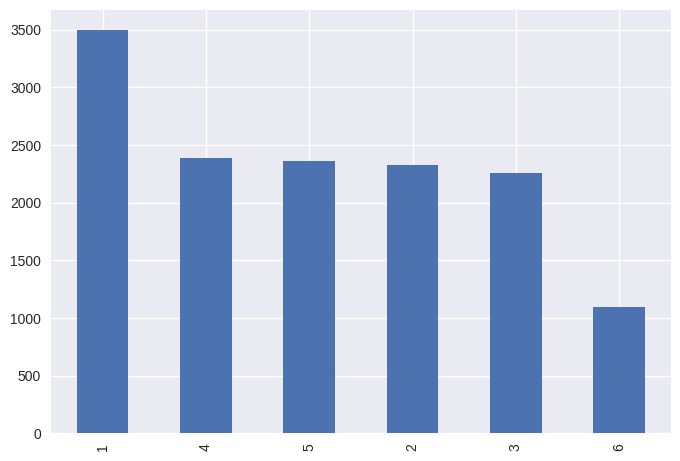

In [ ]:
sales['week'].value_counts().plot(kind='bar');

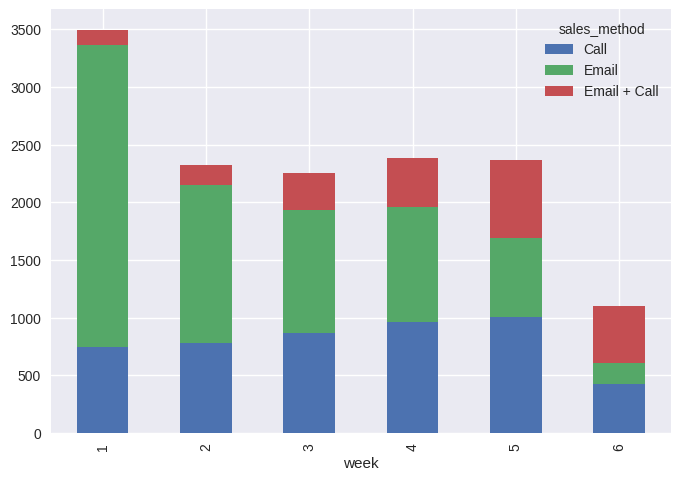

In [ ]:
sales.groupby('sales_method')['week'].value_counts().unstack().T.plot(kind='bar', stacked=True);

In [ ]:
sales['years_as_customer'].value_counts().sort_index().tail()  # not fine

37    2
38    2
39    2
47    1
63    1
Name: years_as_customer, dtype: int64

> 3 values is out. 39, 47, 63. The maximum value is 38 since it is founded in 1984

In [ ]:
sales[sales['years_as_customer'].isin([39, 47, 63])]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
719,1,Email,ae6df2ea-c55a-4251-803f-3daaf49d3f94,9,85.49,39,22,Texas
5567,2,Email,38a2040b-ab8d-4522-a453-07b3d1ff47af,10,101.41,39,25,Tennessee
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [ ]:
sales = sales[~sales['years_as_customer'].isin([39, 47, 63])]

In [ ]:
sales['years_as_customer'].value_counts().tail(2)

38    2
37    2
Name: years_as_customer, dtype: int64

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13922 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13922 non-null  int64  
 1   sales_method       13922 non-null  object 
 2   customer_id        13922 non-null  object 
 3   nb_sold            13922 non-null  int64  
 4   revenue            13922 non-null  float64
 5   years_as_customer  13922 non-null  int64  
 6   nb_site_visits     13922 non-null  int64  
 7   state              13922 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 978.9+ KB


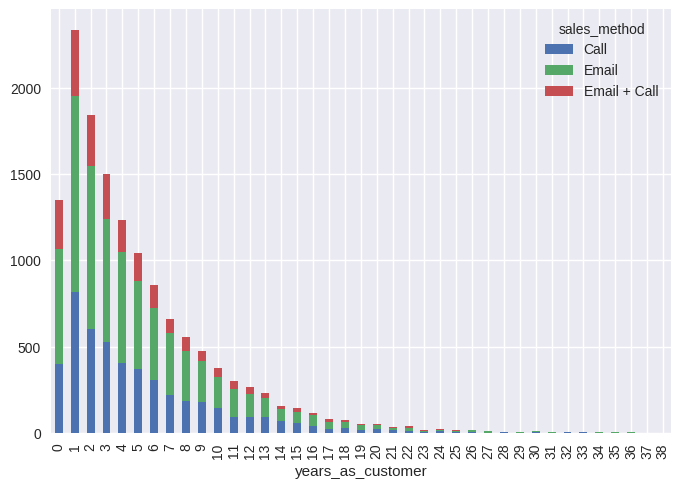

In [ ]:
sales.groupby('sales_method')['years_as_customer'].value_counts().unstack().T.plot(kind='bar', stacked=True);

In [ ]:
sales.pivot_table(values='customer_id',
                  index='sales_method',
                  columns='years_as_customer',
                  aggfunc='count')

years_as_customer,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
sales_method,,,,,,,,,,,,,,,,,,,,,
Call,402.0,817.0,604.0,524.0,406.0,368.0,307.0,222.0,187.0,179.0,...,2.0,5.0,NaN,3.0,4.0,1.0,2.0,2.0,NaN,1.0
Email,663.0,1132.0,944.0,717.0,640.0,510.0,418.0,355.0,288.0,235.0,...,2.0,4.0,6.0,2.0,3.0,6.0,3.0,2.0,1.0,1.0
Email + Call,283.0,387.0,293.0,259.0,186.0,164.0,131.0,84.0,80.0,62.0,...,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN


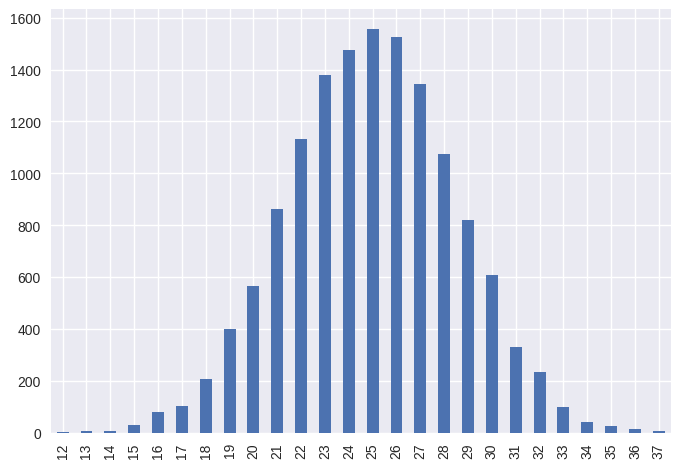

In [ ]:
sales['nb_site_visits'].value_counts().sort_index().plot(kind='bar');  # looks fine

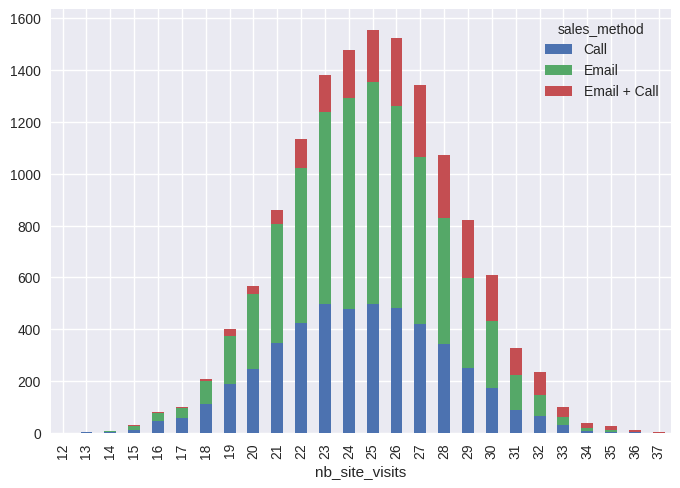

In [ ]:
sales.groupby('sales_method')['nb_site_visits'].value_counts().unstack().T.plot(kind='bar', stacked=True);

> As we can see, most the number of visits are from customers contacted by email then by call

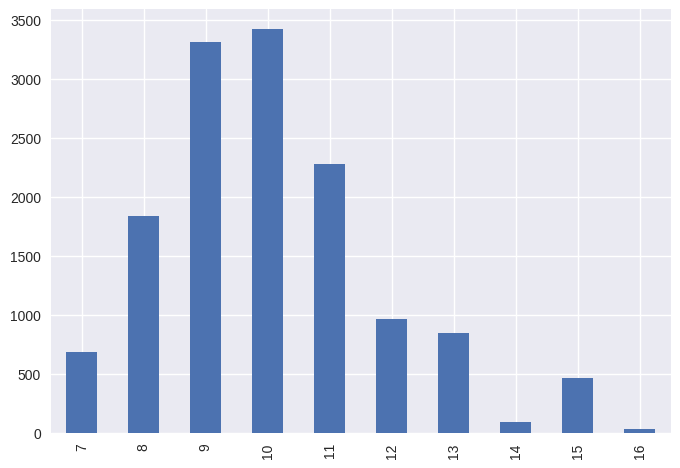

In [ ]:
sales['nb_sold'].value_counts().sort_index().plot(kind='bar');  # looks fine

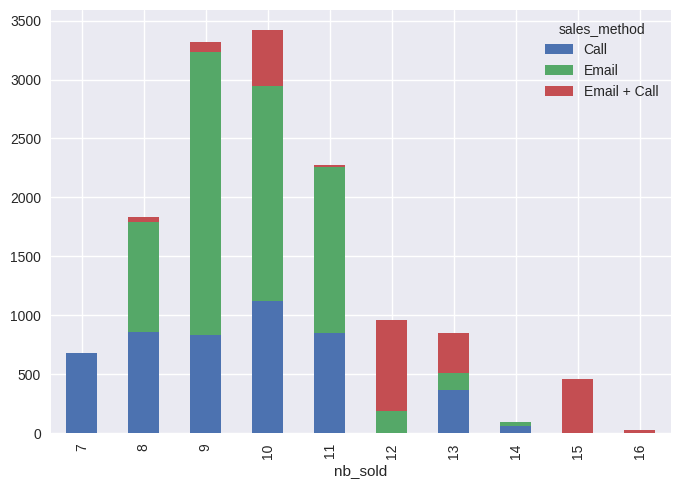

In [ ]:
sales.groupby('sales_method')['nb_sold'].value_counts().unstack().T.plot(kind='bar', stacked=True);

In [ ]:
sales['customer_id'].duplicated().sum()

0

In [ ]:
sales['state'].unique()

array(['Kansas', 'Wisconsin', 'Illinois', 'Mississippi', 'Georgia',
       'Oklahoma', 'Massachusetts', 'Missouri', 'Texas', 'New York',
       'Maryland', 'California', 'Tennessee', 'North Dakota', 'Florida',
       'Michigan', 'North Carolina', 'Pennsylvania', 'Indiana', 'Hawaii',
       'Colorado', 'Louisiana', 'Virginia', 'Arkansas', 'Alaska',
       'Oregon', 'New Hampshire', 'Ohio', 'New Jersey', 'Connecticut',
       'Iowa', 'Montana', 'Washington', 'Arizona', 'Kentucky', 'Alabama',
       'Nebraska', 'South Carolina', 'Minnesota', 'South Dakota', 'Maine',
       'Utah', 'West Virginia', 'Vermont', 'New Mexico', 'Rhode Island',
       'Nevada', 'Delaware', 'Idaho', 'Wyoming'], dtype=object)

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13922 entries, 1 to 14998
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13922 non-null  int64  
 1   sales_method       13922 non-null  object 
 2   customer_id        13922 non-null  object 
 3   nb_sold            13922 non-null  int64  
 4   revenue            13922 non-null  float64
 5   years_as_customer  13922 non-null  int64  
 6   nb_site_visits     13922 non-null  int64  
 7   state              13922 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 978.9+ KB


# EDA

## How many customers were there for each approach?

In [ ]:
counts = sales['sales_method'].value_counts(normalize=False).reset_index().rename(columns={'index': 'sales_method',
                                                                   'sales_method': '# of customers'})


# Creating the bar chart
trace = go.Bar(
    x = counts["sales_method"].to_list(),
    y = counts["# of customers"].to_list(),
    orientation = "v",
    marker = dict(color = ["#0E5E6F"]*1 + ["#A6A6A6"]*1 + ['#9ED5C5']*1 ),
    text = np.round(counts['# of customers']/len(sales)*100, decimals=1),
    texttemplate =  "<b style='color: #fff'>%{text}% </b>"
)

# title format
large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Number of customers by sales method</span>"

layout = dict(
    title = large_title_format,
    font = dict(color = '#0E5E6F'),
    margin = dict(t=70),
    xaxis=dict(side="top", zerolinecolor = "#4d4d4d", zerolinewidth = 0.5, gridcolor="#e7e7e7", tickformat=",.2%"),
    width = 700,
    height= 600,
    plot_bgcolor = "white"
)

fig = go.Figure(data = trace, layout = layout)
fig.show()


In [ ]:
customers_per_methods = sales['sales_method'].value_counts().reset_index().rename(columns={'index': 'sales_method',
                                                                   'sales_method': '# of customers'})
customers_per_methods

,sales_method,# of customers
0,Email,6919
1,Call,4780
2,Email + Call,2223


## What does the spread of the revenue look like overall? And for each method?

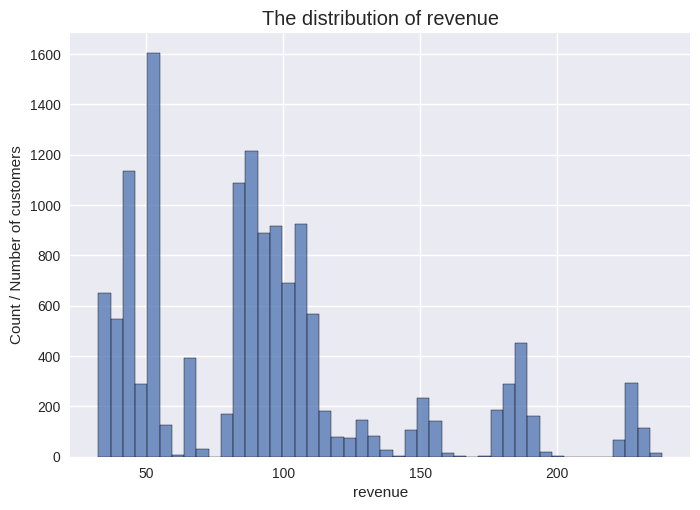

In [ ]:
sns.histplot(sales['revenue'])
plt.title('The distribution of revenue', fontdict={'fontsize': 'x-large'})

plt.ylabel('Count / Number of customers')
plt.show();

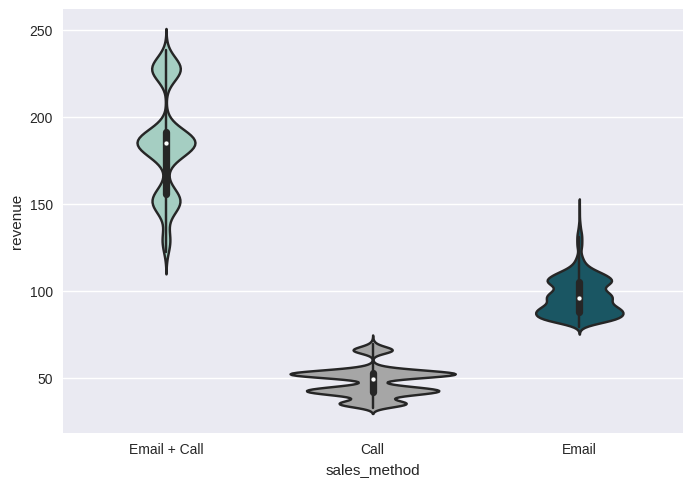

In [ ]:
sns.violinplot(x='sales_method', y='revenue', data=sales, palette=['#9ED5C5', '#A6A6A6', '#0E5E6F']);

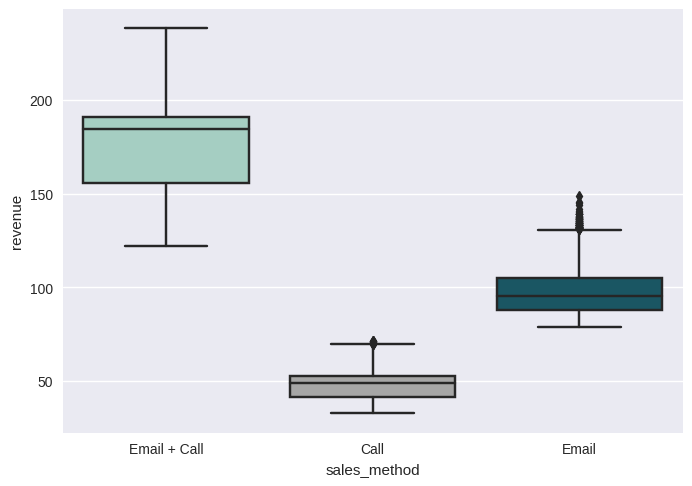

In [ ]:
sns.boxplot(x='sales_method', y='revenue', data=sales, palette=['#9ED5C5', '#A6A6A6', '#0E5E6F']);

In [ ]:
sales.groupby('sales_method')['revenue'].agg(['min', 'max', np.std])

,min,max,std
sales_method,,,
Call,32.54,71.36,8.610699
Email,78.83,148.97,11.211908
Email + Call,122.11,238.32,29.083924


In [ ]:
sales_rev_by_method = sales.groupby('sales_method')['revenue'].sum().sort_values(ascending=False).reset_index()
sales_rev_by_method['revenue']

0    672033.71
1    408256.69
2    227513.02
Name: revenue, dtype: float64

In [ ]:

# Creating the bar chart
trace = go.Bar(
    x = sales_rev_by_method["sales_method"].to_list(),
    y = sales_rev_by_method["revenue"].to_list(),
    orientation = "v",
    marker = dict(color = ["#0E5E6F"]*1 + ['#9ED5C5']*1 + ["#A6A6A6"]*1 ),
    text = np.round(sales_rev_by_method['revenue']/sales['revenue'].sum()*100, decimals=2),
    texttemplate =  "<b style='color: #fff'>%{text}% </b>"
)

# title format
large_title_format = "<span style='font-size:30px; font-family:Times New Roman'>Total revenue by sales method</span>"

layout = dict(
    title = large_title_format,
    font = dict(color = '#0E5E6F'),
    margin = dict(t=70),
    xaxis=dict(side="top", zerolinecolor = "#4d4d4d", zerolinewidth = 0.5, gridcolor="#e7e7e7", tickformat=",.1%"),
    width = 700,
    height= 600,
    plot_bgcolor = "white"
)

fig = go.Figure(data = trace, layout = layout)
fig.show()


> The number of customers is the most by email, then call, and lastly email + call. But when it comes to revenue email + call even though we have the lest number of customers, it comes second in revenue

> Till now, from what I can see, I could recommend email and email + call methods as the best selling methods and the most effective when it comes to time.

## Was there any difference in revenue over time for each of the methods?


In [ ]:
sales_over_week = sales.pivot_table(values='revenue',
                  index='sales_method',
                  columns='week',
                  aggfunc='sum')
sales_over_week

week,1,2,3,4,5,6
sales_method,,,,,,
Call,26159.18,33792.02,36247.27,49543.52,53518.11,28252.92
Email,229680.06,137692.94,98792.14,107788.37,74373.45,23706.75
Email + Call,16885.33,26376.23,48737.14,78296.20,126809.72,111152.07


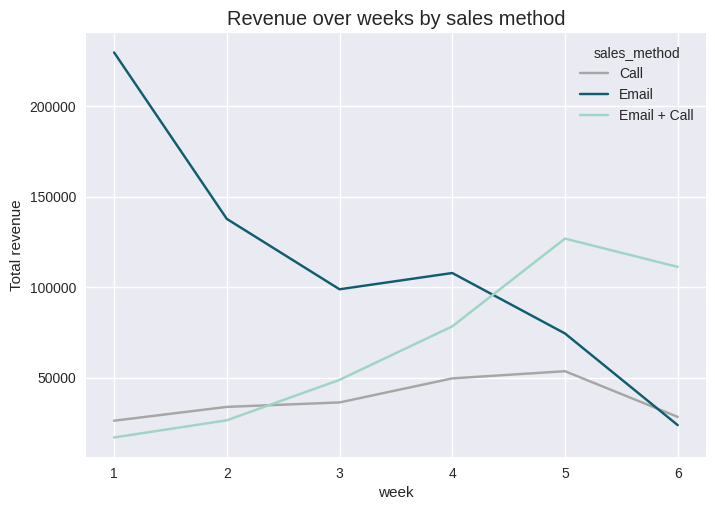

In [ ]:
sns.lineplot(sales_over_week.T, palette=['#A6A6A6', '#0E5E6F', '#9ED5C5'], dashes=False)

plt.title('Revenue over weeks by sales method', fontdict={'fontsize': 'x-large'})
plt.ylabel('Total revenue')
plt.show();